In [1]:
!pip install d2l
!pip install matplotlib==3.0.2

     |████████████████████████████████| 82 kB 596 kB/s 
     |████████████████████████████████| 11.2 MB 24.0 MB/s 
     |████████████████████████████████| 9.9 MB 56.2 MB/s 
     |████████████████████████████████| 61 kB 6.9 MB/s 
     |████████████████████████████████| 900 kB 37.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you h

     |████████████████████████████████| 12.9 MB 6.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Vanishing Gradients

**Salah satu hal yang sering menyebabkan masalah gradien lenyap** adalah pilihan fungsi aktivasi (sigma) yang ditambahkan mengikuti operasi linear setiap layer.

Secara historis, fungsi sigmoid ***1/(1+exp(-x)***(diperkenalkan pada bagian 4.1) populer karena menyerupai fungsi ambang batas.

Karena jaringan saraf buatan dini terinspirasi oleh jaringan saraf biologis, gagasan neuron yang menembak sepenuhnya atau tidak sama sekali (seperti neuron biologis) tampak menarik.

Mari lihat lebih dekat ke sigmoid untuk melihat mengapa itu dapat menyebabkan gradien lenyap.

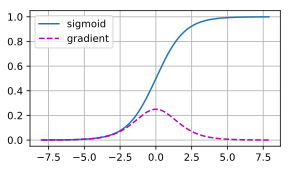

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

Dapat dilihat, gradien Sigmoid lenyap keduanya ketika inputnya besar dan ketika mereka kecil. Selain itu, ketika backpropagating melalui banyak layer, kecuali kita berada di zona Goldilocks, di mana input ke banyak sigmoid mendekati nol, gradien produk keseluruhan dapat hilang.

Ketika jaringan kami menawarkan banyak lapisan, kecuali dilakukan dengan berhati-hati, gradien kemungkinan akan terpotong pada beberapa lapisan.

Memang masalah ini digunakan untuk menabrak pelatihan jaringan yang dalam.

Akibatnya, ReLUs, yang lebih stabil (tetapi masih kurang masuk akal), telah muncul sebagai pilihan default bagi praktisi.

## Exploding Gradients

In [3]:
M = torch.normal(0, 1, size=(4,4))
print('a single matrix \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[ 0.2882,  1.6752,  1.2665,  0.0799],
        [-0.5024,  0.4344,  1.9250,  1.8032],
        [-0.7426,  0.4191,  0.8312, -0.2078],
        [ 0.1438,  0.0309, -0.6638, -0.6889]])
after multiplying 100 matrices
 tensor([[ 2.2130e+22,  1.7560e+22, -5.6519e+22, -1.9807e+21],
        [-5.4212e+23, -4.3016e+23,  1.3846e+24,  4.8541e+22],
        [ 1.8755e+24,  1.4882e+24, -4.7901e+24, -1.6792e+23],
        [ 2.8717e+23,  2.2786e+23, -7.3345e+23, -2.5713e+22]])
